<a href="https://colab.research.google.com/github/RagaaM/Machine-learning/blob/main/KNN_internet_firewall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = pd.read_csv("/content/drive/MyDrive/log2.csv")
Action = {'drop':0, 'allow': 1,'deny':2, 'reset-both':3}
df.Action = [Action[item] for item in df.Action]
target = df.Action

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


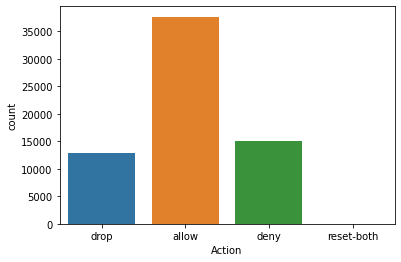

1    37640
2    14987
0    12851
3       54
Name: Action, dtype: int64


In [3]:
# visualize the target variable
g = sns.countplot(df['Action'])
g.set_xticklabels(['drop','allow','deny','reset-both'])
plt.show()
# dataset['Action'].describe()
print(target.value_counts())

**Data Augmentation: Resampling**

In [4]:
from sklearn.utils import resample
print("before resampling: ",df.shape)
class_0=df[df['Action']==0]
class_1=df[df['Action']==1]
class_2=df[df['Action']==2]
class_3=df[df['Action']==3]
df = pd.concat([class_1, class_2, class_3, class_0])

class_0_resample = resample(class_0, n_samples = 10000, replace = True, random_state = 42)
class_1_resample = resample(class_1, n_samples = 10000, replace = True, random_state = 42)
class_2_resample = resample(class_2, n_samples = 10000, replace = True, random_state = 42)
class_3_resample = resample(class_3, n_samples = 10000, replace = True, random_state = 42)
df = pd.concat([class_1_resample, class_2_resample, class_3_resample, class_0_resample])
print("after resampling: " , df.shape)

before resampling:  (65532, 12)
after resampling:  (40000, 12)


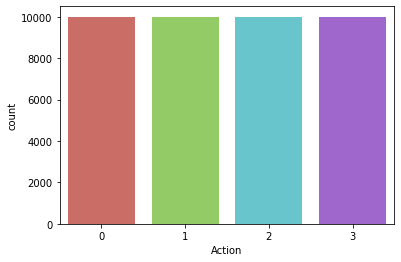

In [5]:
sns.countplot(x='Action',data=df,palette='hls')
plt.show()

In [6]:
y = df['Action'].values
y = y.reshape(-1,1)
X_data = df.drop(['Action'],axis = 1)

**Data Normalization**

In [7]:
df.head()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
28491,49307,443,35042,443,1,245382,6838,238544,214,31,44,170
1567,61119,53,61119,53,1,217,90,127,2,29,1,1
20418,49556,443,19377,443,1,198375,6279,192096,205,153,69,136
12051,51652,80,52729,80,1,32942,2548,30394,58,255,28,30
30229,49228,53,7287,53,1,193,102,91,2,30,1,1


In [8]:
#normalize data
X = (X_data - np.min(X_data)) / (np.max(X_data) / np.min(X_data)).values
X.head()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
28491,0.0,0.0,0.0,0.0,0.047929,0.147830,0.0,0.000908,0.0,0.001726,0.0
1567,0.0,0.0,0.0,0.0,0.000031,0.000654,0.0,0.000004,0.0,0.000000,0.0
20418,0.0,0.0,0.0,0.0,0.038745,0.135638,0.0,0.000870,0.0,0.002729,0.0
12051,0.0,0.0,0.0,0.0,0.006424,0.054264,0.0,0.000243,0.0,0.001084,0.0
30229,0.0,0.0,0.0,0.0,0.000026,0.000916,0.0,0.000004,0.0,0.000000,0.0


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state= 42)
# X_train, X_test, y_train, y_test = train_test_split(X_resampled,target_resampled,test_size=0.25,random_state= 42)
print("X",X.shape)
print("X_train",X_train.shape)
print("X_test",X_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

X (40000, 11)
X_train (30000, 11)
X_test (10000, 11)
y_train (30000, 1)
y_test (10000, 1)


In [10]:
classifier = KNeighborsClassifier(n_neighbors = 7, metric = 'minkowski')
classifier.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=7)

In [11]:
y_pred = classifier.predict(X_test)

In [12]:
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[2509    0    0    0]
 [  98 2426   19    8]
 [ 767   32 1380  291]
 [   0    0  583 1887]]


In [13]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85      2509
           1       0.99      0.95      0.97      2551
           2       0.70      0.56      0.62      2470
           3       0.86      0.76      0.81      2470

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.81     10000
weighted avg       0.82      0.82      0.81     10000



In [14]:
# Calculating the accuracy
accuracy = metrics.accuracy_score(y_test, y_pred) * 100
print("Accuracy = ", accuracy)

Accuracy =  82.02000000000001


Text(0.5, 257.44, 'Predicted label')

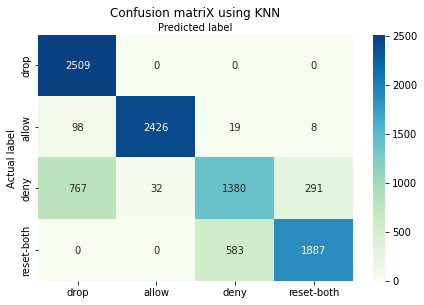

In [15]:
fig, ax = plt.subplots()
labels=['drop','allow','deny','reset-both']

sns.heatmap(pd.DataFrame(cm), annot=True, cmap="GnBu" ,fmt='g', xticklabels = labels, yticklabels = labels) #GnBu
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matriX using KNN', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [16]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

Text(0, 0.5, 'Mean Error')

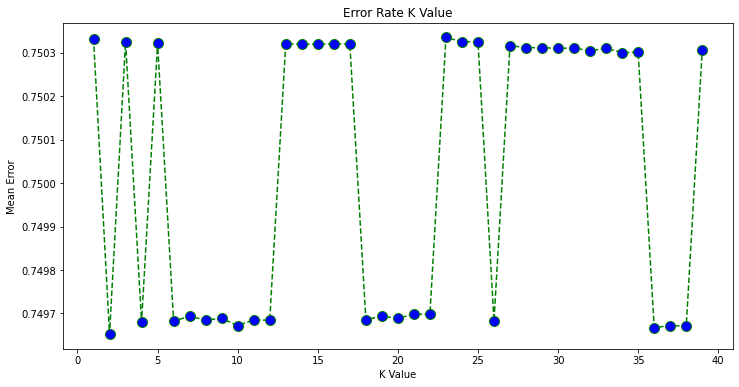

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='green', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')